In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics # for calculating the auc from fpr, tpr
from matplotlib.backends.backend_pdf import PdfPages

plt.style.use("science.mplstyle")


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
base_dir = "/global/home/users/rrmastandrea/MJetCLR/"  # change this to your working directory

# Load in the data

In [3]:
# Load in the data
exp_id_list = ["16k", "12k", "08k", "04k", "02k", "01k", "0p5k", "0p2k", "0p1k", "0p04k", "0k"]

exp_id_S_nums = [16000, 12000, 8000, 4000, 2000, 1000, 500, 200, 100, 40, 0]


exp_id_SB_ratios = [float(x)/float(x+16000) for x in exp_id_S_nums]


"""
lct_const_rep_tpr_dict = {}
lct_const_rep_fpr_dict = {}
nn_const_rep_tpr_dict = {}
nn_const_rep_fpr_dict = {}
trans_BC_tpr_dict = {}
trans_BC_fpr_dict = {}
"""
lct_tpr_dict = {0:{},1:{},2:{}}
lct_fpr_dict = {0:{},1:{},2:{}}
nn_tpr_dict = {0:{},1:{},2:{}}
nn_fpr_dict = {0:{},1:{},2:{}}

lct_auc_dict = {0:[],1:[],2:[]}
nn_auc_dict = {0:[],1:[],2:[]}
lct_maxsic_dict = {0:[],1:[],2:[]}
nn_maxsic_dict = {0:[],1:[],2:[]}


for exp_id in exp_id_list:
    
    full_id = exp_id+"S_16kB_128d"
    
    expt_dir = base_dir + "projects/rep_learning/experiments/SB_ratios_22_18_01/" + full_id + "/"
    constit_num = 50
    
    # Constituent reps
    """
    lct_const_rep_tpr_dict[exp_id] = np.load( expt_dir+"const_rep_lct_tpr_"+str(constit_num)+".npy" )
    lct_const_rep_fpr_dict[exp_id] = np.load( expt_dir+"const_rep_lct_fpr_"+str(constit_num)+".npy" )
    nn_const_rep_tpr_dict[exp_id] = np.load( expt_dir+"const_rep_nn_tpr_"+str(constit_num)+".npy" )
    nn_const_rep_fpr_dict[exp_id] = np.load( expt_dir+"const_rep_nn_fpr_"+str(constit_num)+".npy" )
    """
    
    # Transformer BC 
    """
    trans_BC_tpr_dict[exp_id] = np.load( expt_dir+"trans_BC_tpr_"+str(constit_num)+".npy" )
    trans_BC_fpr_dict[exp_id] = np.load( expt_dir+"trans_BC_fpr_"+str(constit_num)+".npy" )
    """
    
    # CLR trained LCT
    lct_tpr_dict[0][exp_id] = np.load( expt_dir+"CLR_LCT0_tpr_"+str(constit_num)+".npy" )
    lct_fpr_dict[0][exp_id] = np.load( expt_dir+"CLR_LCT0_fpr_"+str(constit_num)+".npy" )
    lct_auc_dict[0].append(metrics.auc(lct_fpr_dict[0][exp_id], lct_tpr_dict[0][exp_id]))
    
    SIC = lct_tpr_dict[0][exp_id]/np.sqrt(lct_fpr_dict[0][exp_id])
    finite_SIC = SIC[np.isfinite(SIC)]
    lct_maxsic_dict[0].append(np.max(finite_SIC))
    
    
    lct_tpr_dict[1][exp_id] = np.load( expt_dir+"CLR_LCT1_tpr_"+str(constit_num)+".npy" )
    lct_fpr_dict[1][exp_id] = np.load( expt_dir+"CLR_LCT1_fpr_"+str(constit_num)+".npy" )
    lct_auc_dict[1].append(metrics.auc(lct_fpr_dict[1][exp_id], lct_tpr_dict[1][exp_id]))
    
    SIC = lct_tpr_dict[1][exp_id]/np.sqrt(lct_fpr_dict[1][exp_id])
    finite_SIC = SIC[np.isfinite(SIC)]
    lct_maxsic_dict[1].append(np.max(finite_SIC))
    
    
    lct_tpr_dict[2][exp_id] = np.load( expt_dir+"CLR_LCT2_tpr_"+str(constit_num)+".npy" )
    lct_fpr_dict[2][exp_id] = np.load( expt_dir+"CLR_LCT2_fpr_"+str(constit_num)+".npy" )
    lct_auc_dict[2].append(metrics.auc(lct_fpr_dict[2][exp_id], lct_tpr_dict[2][exp_id]))

    SIC = lct_tpr_dict[2][exp_id]/np.sqrt(lct_fpr_dict[2][exp_id])
    finite_SIC = SIC[np.isfinite(SIC)]
    lct_maxsic_dict[2].append(np.max(finite_SIC))
    
    
    # CLR trained NN
    nn_tpr_dict[0][exp_id] = np.load( expt_dir+"CLR_NN0_tpr_"+str(constit_num)+".npy" )
    nn_fpr_dict[0][exp_id] = np.load( expt_dir+"CLR_NN0_fpr_"+str(constit_num)+".npy" )
    nn_auc_dict[0].append(metrics.auc(nn_fpr_dict[0][exp_id], nn_tpr_dict[0][exp_id]))
    
    SIC = nn_tpr_dict[0][exp_id]/np.sqrt(nn_fpr_dict[0][exp_id])
    finite_SIC = SIC[np.isfinite(SIC)]
    nn_maxsic_dict[0].append(np.max(finite_SIC))
    
    
    nn_tpr_dict[1][exp_id] = np.load( expt_dir+"CLR_NN1_tpr_"+str(constit_num)+".npy" )
    nn_fpr_dict[1][exp_id] = np.load( expt_dir+"CLR_NN1_fpr_"+str(constit_num)+".npy" )
    nn_auc_dict[1].append(metrics.auc(nn_fpr_dict[1][exp_id], nn_tpr_dict[1][exp_id]))
    
    SIC = nn_tpr_dict[1][exp_id]/np.sqrt(nn_fpr_dict[1][exp_id])
    finite_SIC = SIC[np.isfinite(SIC)]
    nn_maxsic_dict[1].append(np.max(finite_SIC))
    
    
    nn_tpr_dict[2][exp_id] = np.load( expt_dir+"CLR_NN2_tpr_"+str(constit_num)+".npy" )
    nn_fpr_dict[2][exp_id] = np.load( expt_dir+"CLR_NN2_fpr_"+str(constit_num)+".npy" )
    nn_auc_dict[2].append(metrics.auc(nn_fpr_dict[2][exp_id], nn_tpr_dict[2][exp_id]))
    
    SIC = nn_tpr_dict[2][exp_id]/np.sqrt(nn_fpr_dict[2][exp_id])
    finite_SIC = SIC[np.isfinite(SIC)]
    nn_maxsic_dict[2].append(np.max(finite_SIC))
    
    

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in true_divide


# Individual Plots

## TPR / FPR

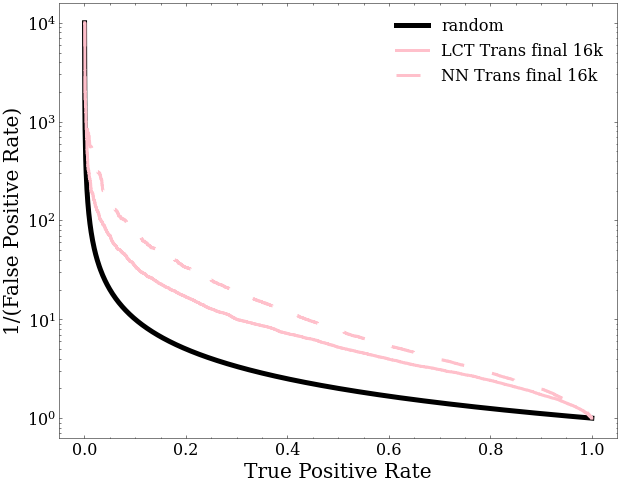

In [4]:
fig = plt.figure(figsize = (10,8))

exp_id_list = ["16k"]#, "12k", "08k", "04k", "02k", "01k", "0p5k", "0p2k", "0p1k", "0p04k", "0k"]

colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]

l = 3

for i, exp_id in enumerate(exp_id_list): 

    # ALL DIMS
    #"""
    # random
    plt.plot(lct_tpr_dict[2][exp_id],1.0/lct_tpr_dict[2][exp_id], label = "random", color = "black", linewidth = 5)

    #plt.plot(lct_const_rep_tpr_dict[exp_id], 1.0/lct_const_rep_fpr_dict[exp_id], label = "LCT Const. rep "+exp_id, color = colors[i], linestyle = "dotted",  linewidth = l)
    #plt.plot(nn_const_rep_tpr_dict[exp_id], 1.0/nn_const_rep_fpr_dict[exp_id], label = "NN Const. rep "+exp_id, color = colors[i], linestyle = "dashed" , linewidth = l)
    plt.plot(lct_tpr_dict[2][exp_id], 1.0/lct_fpr_dict[2][exp_id], label = "LCT Trans final "+exp_id, color = colors[i], linestyle = "solid",  linewidth = l)
    plt.plot(nn_tpr_dict[2][exp_id], 1.0/nn_fpr_dict[2][exp_id], label = "NN Trans final "+exp_id, color = colors[i], linestyle = (0,(8,10)),  linewidth = l)
    #plt.plot(trans_BC_tpr_dict[exp_id], 1.0/trans_BC_fpr_dict[exp_id], label = "Trans BC "+exp_id, color = colors[i], linestyle = "dashdot",  linewidth = l)
    #"""
    
    # ONE DIM
    """
    plt.plot(lct_const_rep_tpr_dict[exp_id], 1.0/lct_const_rep_fpr_dict[exp_id], label = "LCT Const. rep "+exp_id, color = colors[0], linestyle = "dotted",  linewidth = l)
    plt.plot(nn_const_rep_tpr_dict[exp_id], 1.0/nn_const_rep_fpr_dict[exp_id], label = "NN Const. rep "+exp_id, color = colors[1], linestyle = "dashed" , linewidth = l)
    plt.plot(lct_tpr_dict[2][exp_id], 1.0/lct_fpr_dict[2][exp_id], label = "LCT Trans final "+exp_id, color = colors[2], linestyle = "solid",  linewidth = l)
    plt.plot(nn_tpr_dict[2][exp_id], 1.0/nn_fpr_dict[2][exp_id], label = "NN Trans final "+exp_id, color = colors[3], linestyle = (0,(8,10)),  linewidth = l)
    plt.plot(trans_BC_tpr_dict[exp_id], 1.0/trans_BC_fpr_dict[exp_id], label = "Trans BC "+exp_id, color = colors[4], linestyle = "dashdot",  linewidth = l)
    """
 
    
plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")
plt.legend()
plt.show()


#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
##pp.savefig(fig)
#pp.close()



## SIC

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/p

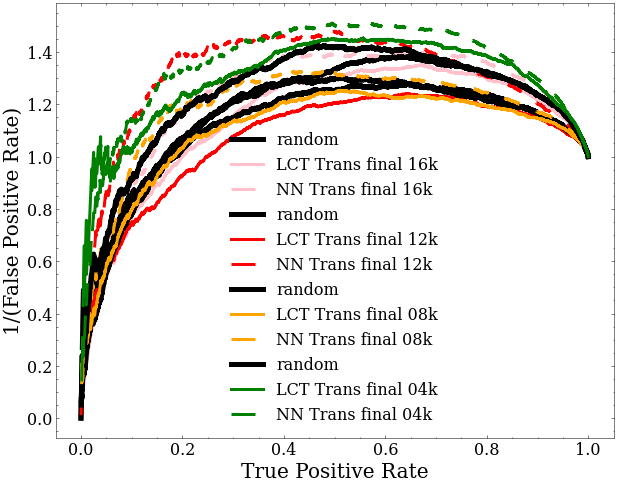

In [8]:
fig = plt.figure(figsize = (10,8))

exp_id_list = ["16k", "12k", "08k", "04k"]#, "02k", "01k", "0p5k", "0p2k", "0p1k", "0p04k", "0k"]

colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]

l = 3

with np.errstate(divide='ignore'):

    for i, exp_id in enumerate(exp_id_list): 

        # ALL DIMS
        #"""
        # random
        plt.plot(nn_tpr_dict[0][exp_id], nn_tpr_dict[0][exp_id]/np.sqrt(nn_fpr_dict[0][exp_id]), label = "random", color = "black", linewidth = 5)

        plt.plot(nn_tpr_dict[1][exp_id], nn_tpr_dict[1][exp_id]/np.sqrt(nn_fpr_dict[1][exp_id]), label = "LCT Trans final "+exp_id, color = colors[i], linestyle = "solid",  linewidth = l)

        plt.plot(nn_tpr_dict[2][exp_id], nn_tpr_dict[2][exp_id]/np.sqrt(nn_fpr_dict[2][exp_id]), label = "NN Trans final "+exp_id, color = colors[i], linestyle = (0,(8,10)),  linewidth = l)

        #"""

 
    
#plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")
plt.legend()
plt.show()


#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
##pp.savefig(fig)
#pp.close()



# Summary plots

## Final AUC

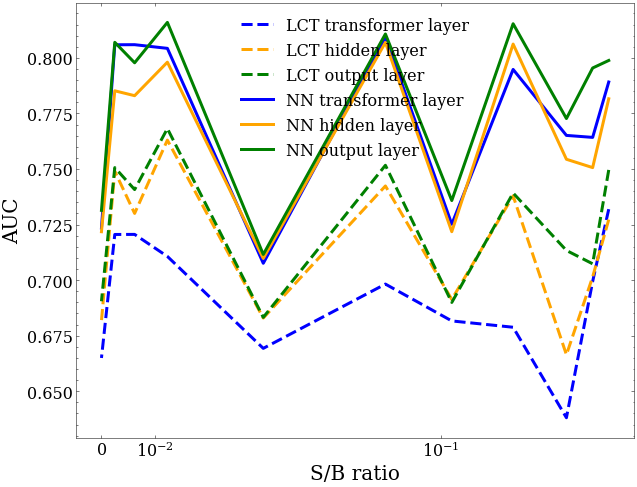

In [6]:
# Load in the data
exp_id_list = ["16k", "12k", "08k", "04k", "02k", "01k", "0p5k", "0p2k", "0p1k", "0p04k", "0k"]
exp_id_S_nums = [16000, 12000, 8000, 4000, 2000, 1000, 500, 200, 100, 40, 0]

exp_id_SB_ratios = [float(x)/float(x+16000) for x in exp_id_S_nums]


colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]


from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure(figsize = (10,8))

l = 3

plt.plot(exp_id_SB_ratios, lct_auc_dict[0], label = "LCT transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_auc_dict[1], label = "LCT hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_auc_dict[2], label = "LCT output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_auc_dict[0], label = "NN transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_auc_dict[1], label = "NN hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_auc_dict[2], label = "NN output layer", color = "green", linewidth = l)

    
plt.xscale("symlog", linthresh=.05)
plt.xlabel("S/B ratio")
plt.ylabel("AUC")
plt.legend()
plt.show()



#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()



## max SIC

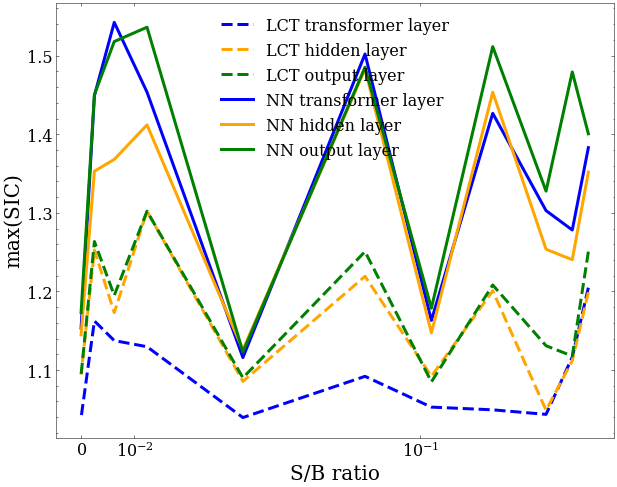

In [7]:
# Load in the data
exp_id_list = ["16k", "12k", "08k", "04k", "02k", "01k", "0p5k", "0p2k", "0p1k", "0p04k", "0k"]
exp_id_S_nums = [16000, 12000, 8000, 4000, 2000, 1000, 500, 200, 100, 40, 0]

exp_id_SB_ratios = [float(x)/float(x+16000) for x in exp_id_S_nums]


colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]


from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure(figsize = (10,8))

l = 3

plt.plot(exp_id_SB_ratios, lct_maxsic_dict[0], label = "LCT transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[1], label = "LCT hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[2], label = "LCT output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_maxsic_dict[0], label = "NN transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_maxsic_dict[1], label = "NN hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_maxsic_dict[2], label = "NN output layer", color = "green", linewidth = l)

    
plt.xscale("symlog", linthresh=.05)
plt.xlabel("S/B ratio")
plt.ylabel("max(SIC)")
plt.legend()
plt.show()



#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()

